<AxesSubplot:>

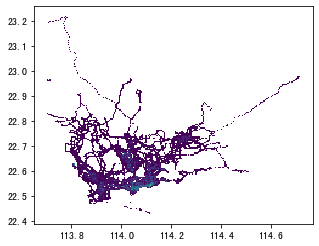

In [1]:
import transbigdata
import pandas as pd
#读取数据    
data = pd.read_csv('TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']      
#定义范围
bounds = [113.7, 22.42, 114.3, 22.8]
#获取栅格化参数
params = transbigdata.grid_params(bounds,accuracy = 500)
#将GPS栅格化
data['LONCOL'],data['LATCOL'] = transbigdata.GPS_to_grids(data['Lng'],data['Lat'],params)
data = data[(data['LONCOL']>0)&(data['LATCOL']>0)]
#集计栅格数据量
datatest = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#生成栅格地理图形
datatest['geometry'] = transbigdata.gridid_to_polygon(datatest['LONCOL'],datatest['LATCOL'],params)
#转为GeoDataFrame
import geopandas as gpd
datatest = gpd.GeoDataFrame(datatest)
#绘制
datatest.plot(column = 'VehicleNum')

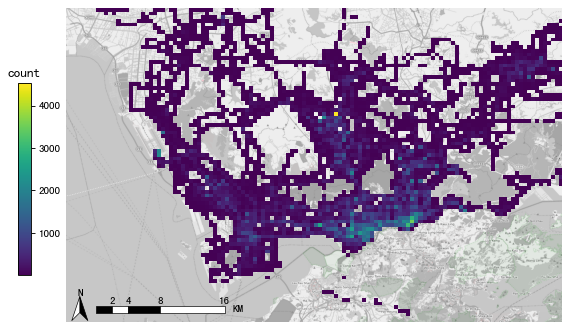

In [2]:
#创建图框
import matplotlib.pyplot as plt
import plot_map
fig =plt.figure(1,(8,8),dpi=80)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
transbigdata.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制栅格
datatest.plot(ax = ax,column = 'VehicleNum',cax = cax,legend = True)
#添加比例尺和指北针
transbigdata.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03])
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()